In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 80
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['svg.fonttype'] = 'none'

# A new stereo-video approach to characterize and monitor reef fish spawning aggregations based on the first record of a spawning aggregation of the Mexican hogfish Bodianus diplotaenia in the Galapagos Marine Reserve

Data are available in the `share` directory of this package:

In [2]:
from path import path
data = path('../share')

The [pandas](http://pandas.pydata.org/pandas-docs/stable/index.html) package is used for data manipulation.

In [3]:
from pandas import DataFrame, read_csv, np

The [matplotlib](http://matplotlib.org/) package is used for $2$D data visualization.

In [4]:
from matplotlib import pyplot as plt

Import [RPy2](http://rpy.sourceforge.net/) package for R analyses embedded in the IPython notebook

In [5]:
import math

## Biomass

In order to fit the allometric relationship between the length and weight, we use the linear model

$$ \log(w_i) = \alpha + \beta \times \log(l_i) + \epsilon_i,$$

where

* $i$ denotes an individual,
* $w_i$ denotes its weight,
* $l_i$ denotes its length,
* $\alpha$ denotes the intercept (theoritical weight of fish of length $0.0$),
* $\beta$ denotes the slope.
* $\epsilon_i$ denotes the Gaussian noise.

In [6]:
biomass = read_csv(data/'biomass.csv', sep=',')
fig = plt.figure(figsize=(15,5))
axes = plt.subplot(1,1,1)
logx = True
logy = True
x = biomass.FL
y = biomass.W
if logx:
    x = [math.log(x) for x in x]
if logy:
    y = [math.log(y) for y in y]       
plt.plot(x,y,'o')
axes.set_xlabel('log(Length)')
axes.set_ylabel('log(Weight)')

## Selecting a site

In [7]:
transect = read_csv(data/'transects_bis.csv', sep=',')
temp = transect[transect.Period == 'C3']
temp = temp[temp.Site == 'Punta Suarez']
temp

Site Period       Transectos  Length               Species  \
115  Punta Suarez     C3  Punta Suarez C3     372  Bodianus diplotaenia   
116  Punta Suarez     C3  Punta Suarez C3     358  Bodianus diplotaenia   

     Number Stage  
115       1     M  
116       1     M

In [8]:
transect

Site Period              Transectos  Length  \
0    Bahia Gardner norte     C1  Bahia Gardner norte C1     377   
1    Bahia Gardner norte     C1  Bahia Gardner norte C1     197   
2    Bahia Gardner norte     C1  Bahia Gardner norte C1     249   
3    Bahia Gardner norte     C1  Bahia Gardner norte C1     256   
4    Bahia Gardner norte     C1  Bahia Gardner norte C1     284   
5    Bahia Gardner norte     C1  Bahia Gardner norte C1     255   
6    Bahia Gardner norte     C1  Bahia Gardner norte C1     363   
7    Bahia Gardner norte     C3  Bahia Gardner norte C3     332   
8    Bahia Gardner norte     C3  Bahia Gardner norte C3     166   
9    Bahia Gardner norte     C3  Bahia Gardner norte C3     224   
10   Bahia Gardner norte     C3  Bahia Gardner norte C3     389   
11   Bahia Gardner norte     A1  Bahia Gardner norte A1     324   
12   Bahia Gardner norte     A1  Bahia Gardner norte A1     220   
13   Bahia Gardner norte     A1  Bahia Gardner norte A1     333   
14   Bahia Gardner norte     A1  Bahia Gardner norte A1     445   
15   Bahia Gardner norte     A1  Bahia Gardner norte A1     345   
16   Bahia Gardner norte     A1  Bahia Gardner norte A1     307   
17   Bahia Gardner norte     A1  Bahia Gardner norte A1     398   
18   Bahia Gardner norte     A1  Bahia Gardner norte A1     360   
19   Bahia Gardner norte     A1  Bahia Gardner norte A1     417   
20   Bahia Gardner norte     A1  Bahia Gardner norte A1     368   
21   Bahia Gardner norte     A1  Bahia Gardner norte A1     381   
22   Bahia Gardner norte     A1  Bahia Gardner norte A1     444   
23   Bahia Gardner norte     A1  Bahia Gardner norte A1     319   
24   Bahia Gardner norte     A1  Bahia Gardner norte A1     368   
25   Bahia Gardner norte     A1  Bahia Gardner norte A1     371   
26   Bahia Gardner norte     A1  Bahia Gardner norte A1     413   
27   Bahia Gardner norte     A1  Bahia Gardner norte A1     415   
28   Bahia Gardner norte     A1  Bahia Gardner norte A1     580   
29   Bahia Gardner norte     A1  Bahia Gardner norte A1     277   
..                   ...    ...                     ...     ...   
87   Bahia Gardner norte     A2  Bahia Gardner norte A2     230   
88   Bahia Gardner norte     A2  Bahia Gardner norte A2     246   
89   Bahia Gardner norte     A2  Bahia Gardner norte A2     372   
90   Bahia Gardner norte     A2  Bahia Gardner norte A2     312   
91   Bahia Gardner norte     A2  Bahia Gardner norte A2     162   
92   Bahia Gardner norte     A2  Bahia Gardner norte A2     332   
93   Bahia Gardner norte     A2  Bahia Gardner norte A2     210   
94   Bahia Gardner norte     A2  Bahia Gardner norte A2     325   
95   Bahia Gardner norte     A2  Bahia Gardner norte A2     322   
96   Bahia Gardner norte     A2  Bahia Gardner norte A2     261   
97   Bahia Gardner norte     A2  Bahia Gardner norte A2     281   
98   Bahia Gardner norte     A2  Bahia Gardner norte A2     274   
99   Bahia Gardner norte     A2  Bahia Gardner norte A2     197   
100  Bahia Gardner norte     A2  Bahia Gardner norte A2     192   
101  Bahia Gardner norte     A2  Bahia Gardner norte A2     183   
102  Bahia Gardner norte     A2  Bahia Gardner norte A2     280   
103       Islote Gardner     C2       Islote Gardner C2     233   
104       Islote Gardner     C2       Islote Gardner C2     246   
105       Islote Gardner     C3       Islote Gardner C3     242   
106         Punta Suarez     C1         Punta Suarez C1     382   
107         Punta Suarez     C1         Punta Suarez C1     284   
108         Punta Suarez     C1         Punta Suarez C1     474   
109         Punta Suarez     C2         Punta Suarez C2     271   
110         Punta Suarez     C2         Punta Suarez C2     317   
111         Punta Suarez     C2         Punta Suarez C2     233   
112         Punta Suarez     C2         Punta Suarez C2     306   
113         Punta Suarez     C2         Punta Suarez C2     296   
114         Punta Suarez     C2         Punta Suarez C2     255   


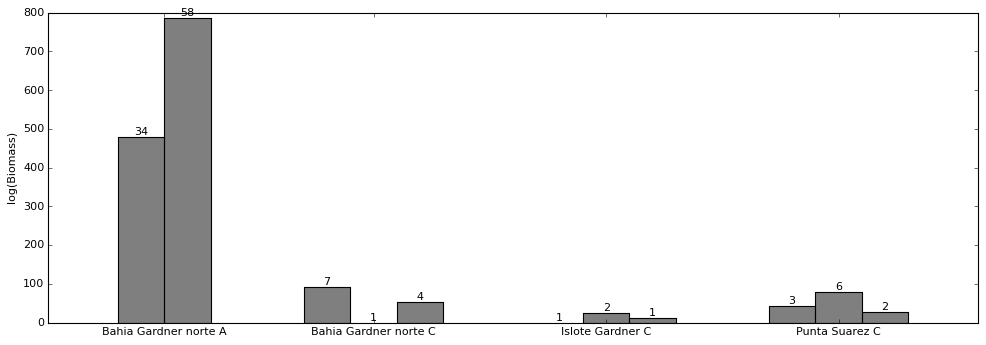

In [9]:
transect = read_csv(data/'transect.csv', sep=',')
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,1,1)
width = .5
x = 0
delta = 1.
_delta = delta
transects = sorted(set(transect.Transect))
cmap = plt.get_cmap('gray', len(transects))
xticks = []
for t in range(len(transects)):
    ttransect = transect[transect.Transect == transects[t]]
    y = -4.19841*ttransect.Diplotaenia + 3.08765 * ttransect.LogLength
    rects = axes.bar(np.array(range(x, x+len(y)))*width-width/2+_delta, y, width, color=(0., 0., 0., .5))#cmap(t))
    for rect, nb in zip(rects, ttransect.Diplotaenia.tolist()):
        height = rect.get_height()
        if not np.isfinite(height):
            height = 0
        axes.text(rect.get_x()+rect.get_width()/2., height+1., '%d'%int(nb),
                ha='center', va='bottom')
    xticks.append((x+len(y)/2.)*width-width/2+_delta)
    x += len(y)
    _delta += delta
axes.set_xticks(xticks)
axes.set_xticklabels(transects)
#axes.set_xlabel('Site')
axes.set_ylabel('log(Biomass)')
fig.savefig('transect.svg')

On this table the results of the linear model are displayed.
In particular:

* $\alpha = -4.19841$ (first column on line (Intercept)) and significantly different from $0.0$ (last column on line (Intercept)),
* $\beta = 3.09$ (first column on line log(FL)) and significantly different from $0.0$ (last column on line log(FL)).

The following plots can be used to verify the validity of linear model underlying hypotheses.
In particular:

* The top-left graph enable the verification of the homoscedasticity.
* The top-right graph enable the verification of the normality of errors.

And the graphic below illustrate the adjustment of the linear model (red line) to the data (blue dots). 

We are now interested into converting randomly collected lengths in the video (see graph below) into weights using the previous length-weight allometric relationship.

ERROR: Line magic function `%Rpush` not found.


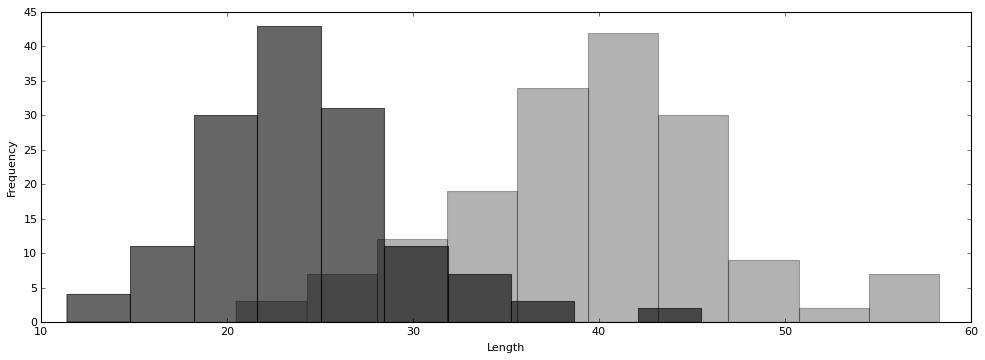

In [10]:
lengths = read_csv(data/'lengths.csv', sep=',')
fig = plt.figure(figsize=(15,5))
axes = plt.subplot(1,1,1)
for sex, color in zip(['M', 'F'], [.3, .6]):
    axes.hist(lengths.Length[lengths.Stage == sex].tolist(),
              alpha=color, color='k', normed=False)
axes.set_xlabel('Length')
axes.set_ylabel('Frequency')
fig.savefig('length.svg')
#%Rpush lengths

In [15]:
lengths[lengths.Stage == 'F'].describe()

Length
count  142.000000
mean    24.140141
std      5.390497
min     11.400000
25%     20.725000
50%     24.100000
75%     26.675000
max     45.500000

On this graph are displayed the histograms of lengths for:

* females, in red,
* males, in blue.

In order to test if the sex has an influence on the length, we use the linear model

$$ l_i = \alpha_{s_i} + \epsilon_i,$$

where

*   $i$ denotes an individual.
*   $l_i$ is its length.
*   $\alpha_{s_i}$ is a coefficient depending on the sex of the individual.
    There two different coefficients : $\alpha_{F}$ for females and $\alpha_M$ for males.
*   $\epsilon_i$ is the Gaussian noise.

On this table are displayed the estimated average length of:

* females, $\alpha_F = 24.14$ (first column on line (Intercept)) and significantly different from $0$ (last column on line (Intercept)),
* males, $\alpha_M = 24.14+15.65=39.79$ (first column on line (Intercept) plus the first column on line StageM) and significantly different from  the average of females (last column on line StageM).

The following plots can be used to verify the validity of linear model underlying hypotheses.
In particular:

* The top-left graph enable the verification of the homoscedasticity.
* The top-right graph enable the verification of the normality of errors.

Using the allometric relationships we display below the histogram of weights conditionally to the sex:

* In blue the histogram of male weights.
* In red the histogram of female weights.

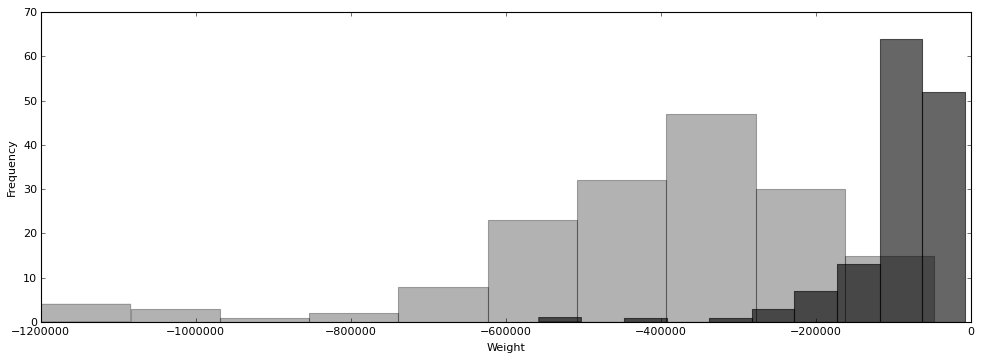

In [12]:
#%Rpull coefficients
#coefficients = np.array(coefficients)
alpha = -4.19841 #math.exp(coefficients[0,0])
beta = 3.09#coefficients[1,0]
fig = plt.figure(figsize=(15,5))
axes = plt.subplot(1,1,1)
for sex, color in zip(['M', 'F'], [.3, .6]):
    axes.hist([alpha*length**beta for length in lengths.Length[lengths.Stage == sex].tolist()],
              alpha=color, color='k', normed=False)
axes.set_xlabel('Weight')
axes.set_ylabel('Frequency')
fig.savefig('weight.svg')

## Describing the reproductive behaviour of the species based on tangible quantitative data and explicit 3D representation of the spawning event.

### Preamble

Using [VTK](http://www.vtk.org/) to visualize frames.

In [13]:
from wanda.frame import vtk

To ease the *VTK* interactions we provide $3$ functions

* `renderers`, initialize differnt views of the same frame (e.g. one for viewing only males and one for viewing only females)
* `synchornize`, allow different views of the same frame (see above) to share the same camera in order to ease comparisons (when the camera of a view is moved, the other views moves in the same manner).
* `show`, is just an aggregation of *VTK* commands to display the frame and convert the selected view into a PNG image embedded in the notebook using [matplotlib](http://matplotlib.org/1.4.0/index.html) (if a name is provided, the image is written on the disk with the given name).

In [14]:
from wanda.frame import renderers, synchronize, show

A frame is represented by a set of $3$D points (columns **X**, **Y** and **Z**) associated to an indentifier (**Type**).
The identifier used are :

* G, for ground.
* M, for bodanius males.
* F, for bodanius females.

In [15]:
id_frame = 2
frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
frame

Unnamed: 0 Type  Precision    RMS     Range  Direction        X        Y  \
0            19    M      18841   3609   6946071      22366 -2495922   768215   
1            20    M      17684    121   6694072      20331 -2189589   684936   
2            21    M      10987  17919   5357418      12336   193847 -1210530   
3            22    M      14547   6941   6239373       9509  -988059   196378   
4            23    M      20899   1983   7628989       5484  -720332  -232559   
5            24    M      16463  14334   6695507       7474   627176  -709002   
6            25    M      15715  14497   6470704      13551  1380835  -725420   
7            26    M      10545   2483   5411748      15792  1469916     9920   
8            27    M      17165   8017   7098827       2423  -146014   150146   
9            28    M      22659   5080   7554364      15250 -1249228  1430011   
10           29    M      30090   5311   8769187      14222 -1315604  1571610   
11           30    M      19024   3224   7179622      11867   441680  1297695   
12           31    M      26849   2068   8705464      12180  1812728   161441   
13           32    M      30749   3768   9018521      12351 -1792906   572623   
14           33    M      32470   3202   9280584      11415 -1588821   777838   
15           34    F      23733  10020   8109363      14858  2057388  -425348   
16           35    F      17273    680   6810166      11123  -372308  1154242   
17           36    M      17814   1028   7214300       4075   -80607   392622   
18           37    F      13123   2928   5708157      14219  -749360 -1272241   
19           38    F      15910   2249   6640921       5199  -116773  -694687   
20           39    F      12350   3221   5754900       6251  -411897  -562550   
21           40    M      14377   7848   6127411       8780  -571542  -835859   
22           41    F      16248   7438   6446148      11217  -681711 -1152151   
23           42    F      15637   5301   6351190      10056  -661854  -988475   
24           43    F      10646   2871   5147549      12119  -820838  -782378   
25           44    F      14234   2530   5963285      12585  -902371 -1026723   
26           45    M      22227    245   7802088       6910  -292800 -1014088   
27           46    F      19406   8379   7238955       6830  -515245  -803121   
28           47    F      17608   4735   6865776       7346  -792965  -484112   
29           48    F      15211   7600   6437565       5564  -462544  -520198   
..          ...  ...        ...    ...       ...        ...      ...      ...   
109         128    G      23121   5678   7903857      17838  2147379 -1236929   
110         129    G      26552   2910   8586082       8047  1129976  -543792   
111         130    G      21397   5134   7784349       7379   999749  -130062   
112         131    G      40252   2044  10247791      16136 -2737164   631227   
113         132    G      21057    906   7357098      20710 -2578024  -459120   
114         133    G      22369   2731   7498935      14884 -1826218  -726893   
115         134    G      34050   5017   9179147      15708 -2068270 -1516961   
116         135    G      16050   2231   6268908      21243 -1978523 -1207680   
117         136    G      14673   7271   6001555      22562 -1953161 -1306950   
118         137    G      23718   2173   8264767       3021  -414653  -263559   
119         138    G      21595   4621   7970400       1540  -211655   -92558   
120         139    G      17675     41   7190122        582   -63980  -148799   
121         140    G      17805  12389   6855718      11131   733592 -1207713   
122         141    G      22679   3534   7738931      11903  1124198 -1252531   
123         142    G      33368   9216   9446081      14366  2063601 -1255636   
124         143    G      37111   2579  10056139      17075  2719273 -1302532   
125         144    G      20406   7479   7728873       2123   276490  -196227   
126         145    G      21162   49

On each frame, bodanius are are represented by spheres

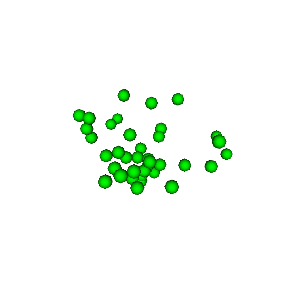

In [16]:
from wanda.frame import plot_spheres

window = vtk.vtkRenderWindow()
renderer = renderers(window, 1,1).pop()

plot_spheres(frame[frame.Type != 'G'], renderer, 0., 1., 0., size=200000)

show(window)
del window

On each frame the ground is represented by a surface representing the delaunay triangulation of avaible points.

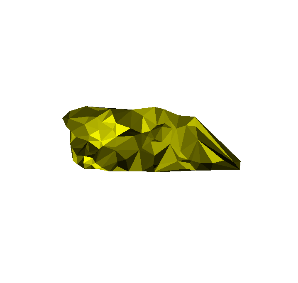

In [17]:
from wanda.frame import plot_delaunay_2D

window = vtk.vtkRenderWindow()
renderer = renderers(window, 1,1).pop()

plot_delaunay_2D(frame[frame.Type == 'G'], renderer, 1., 1., 0.)

show(window)
del window

The resulting frame is a combination of:

* A yellow surface representing the ground.
* Blue spheres representing male bodanius.
* Red spheres representing female bodanius.

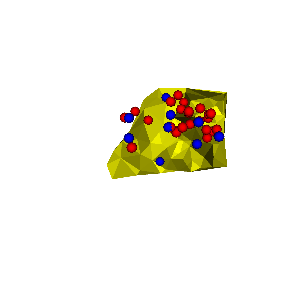

In [18]:
id_frame = 4
frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')

window = vtk.vtkRenderWindow()
renderer = renderers(window, 1,1).pop()

plot_spheres(frame[frame.Type == 'M'], renderer, 0., 0., 1., size=200000)
plot_spheres(frame[frame.Type == 'F'], renderer, 1., 0., 0., size=200000)
plot_delaunay_2D(frame[frame.Type == 'G'], renderer, 1., 1., 0.)

show(window, magnification=5, name='./frame.png')
del window

### Distances between individuals

Since the units of positions are in micrometers, one use the `SI` function to convert them into meters.

In [16]:
from wanda.tools import SI

In order to compare behaviours of males and females we consider sex minimal intra and inter-distances.
The minimal intra-distance is the minimal distance of one individual to another individual of the same sex.
*A contrario*, the minimal inter-distance is the minimal distance of one individual to another individual of the other sex.
These distances are displayed using conditional histograms for males (in blue) and females (in red) and statistically compared using:

* [Wilcoxon rank sum test](http://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test),
* Gamma [GLMs](http://en.wikipedia.org/wiki/Generalized_linear_model), 
* Model selection using the `step` function and the Bayesian Information Criterion ([BIC](http://en.wikipedia.org/wiki/Bayesian_information_criterion)).

The Wilcoxon rank sum test and Gamma GLMs are used since the obersations are clearly non-normal.

#### Intra-distances

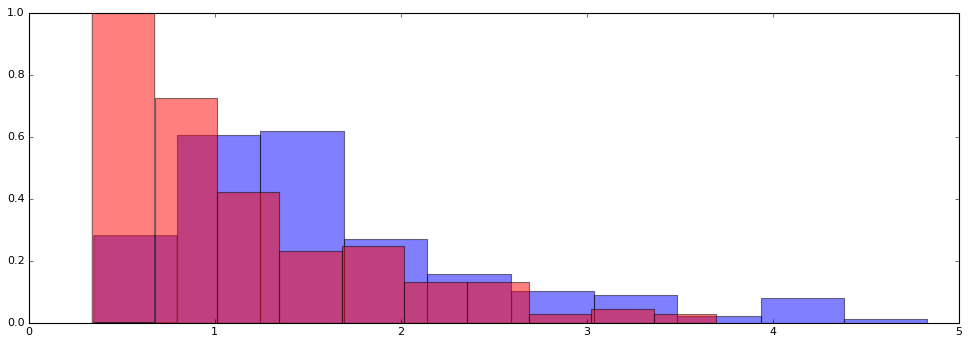

In [17]:
from wanda.distances import intra
frames = []
for id_frame in range(1,20):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    for sex in ['F', 'M']:
        if id_frame < 16:
            X, Y, Z = SI(frame[frame.Type == sex], 'micro')
        else:
            X, Y, Z = SI(frame[frame.Type == sex], 'mm')
        for d in intra(X, Y, Z):
            frames.append([d, sex])
frames = DataFrame(data=frames, columns=['d', 'sex'])
#%Rpush frames
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,1,1)
histM = axes.hist(frames[frames.sex == 'M'].d.tolist(), alpha=.5, color='b', normed=True)
histF = axes.hist(frames[frames.sex == 'F'].d.tolist(), alpha=.5, color='r', normed=True)

In [18]:
frames[frames.sex == 'M'].describe()

d
count  199.000000
mean     1.632286
std      0.873584
min      0.350178
25%      1.047325
50%      1.369791
75%      1.895706
max      4.831722

In [19]:
frames[frames.sex == 'F'].describe()

d
count  206.000000
mean     1.112671
std      0.713295
min      0.342031
25%      0.581592
50%      0.874903
75%      1.512766
max      3.695401

The three approaches (Test, GLMs+Test and Model selection) are considering that intra-distances within females and within males are significatively different.
Males tend to be less close than females.

#### Inter-distances

Inter-distances are not really relevant and are not significatively different.
The approach below comparing intra-distances to inter-distances seems to be more relevant.

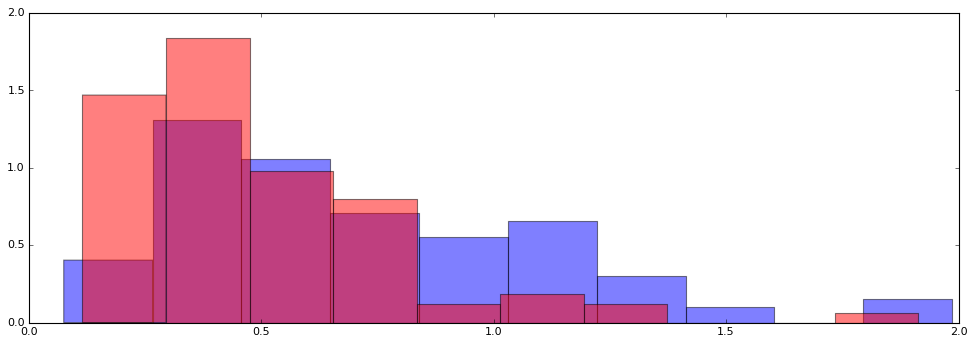

In [20]:
from wanda.distances import inter
frames = []
for id_frame in range(1,20):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    for sex in ['F', 'M']:
        if id_frame < 16:
            X0, Y0, Z0 = SI(frame[frame.Type == sex], 'micro')
            X1, Y1, Z1 = SI(frame[frame.Type == 'G'], 'micro')
        else:
            X0, Y0, Z0 = SI(frame[frame.Type == sex], 'mm')
            X1, Y1, Z1 = SI(frame[frame.Type == 'G'], 'mm')
        for d in inter(X0, Y0, Z0, X1, Y1, Z1):
            frames.append([d, sex])
frames = DataFrame(data=frames, columns=['d', 'sex'])
#%Rpush frames
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,1,1)
histM = axes.hist(frames[frames.sex == 'M'].d.tolist(), alpha=.5, color='b', normed=True)
histF = axes.hist(frames[frames.sex == 'F'].d.tolist(), alpha=.5, color='r', normed=True)

In [21]:
frames[frames.sex == 'M'].describe()

d
count  104.000000
mean     0.715969
std      0.401380
min      0.075545
25%      0.397572
50%      0.619390
75%      0.969800
max      1.985861

In [22]:
frames[frames.sex == 'F'].describe()

d
count  91.000000
mean    0.496095
std     0.303445
min     0.115864
25%     0.291483
50%     0.411062
75%     0.624977
max     1.912971

#### Comparison of inter and intra-distances

We compare hereabove the intra and inter-distances for males and females.
For both, after a statistical analysis it appears that males are closest to females than to males and vice-versa.

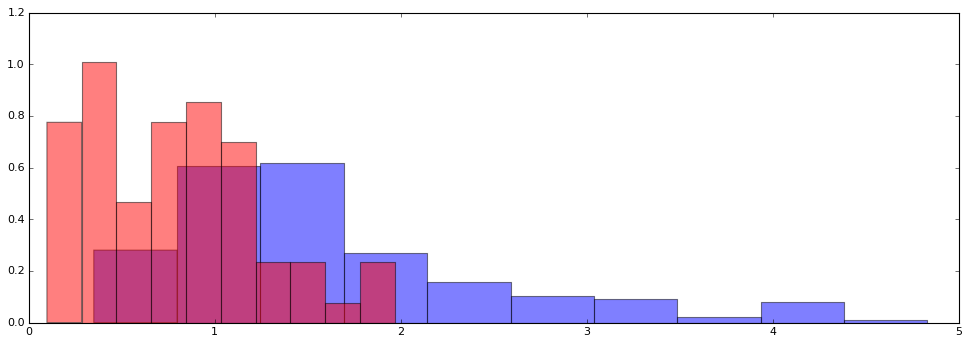

In [23]:
frames = []
for id_frame in range(1,20):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    if id_frame < 16:
        X0, Y0, Z0 = SI(frame[frame.Type == 'M'], 'micro')
        X1, Y1, Z1 = SI(frame[frame.Type == 'F'], 'micro')
    else:
        X0, Y0, Z0 = SI(frame[frame.Type == 'M'], 'mm')
        X1, Y1, Z1 = SI(frame[frame.Type == 'F'], 'mm')  
    for d in inter(X0, Y0, Z0, X1, Y1, Z1):
        frames.append([d, 'F'])
    for d in intra(X0, Y0, Z0):
        frames.append([d, 'M'])
frames = DataFrame(data=frames, columns=['d', 'sex'])
#%Rpush frames
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,1,1)
histM = axes.hist(frames[frames.sex == 'M'].d.tolist(), alpha=.5, color='b', normed=True)
histF = axes.hist(frames[frames.sex == 'F'].d.tolist(), alpha=.5, color='r', normed=True)

In [24]:
frames[frames.sex == 'M'].describe()

d
count  199.000000
mean     1.632286
std      0.873584
min      0.350178
25%      1.047325
50%      1.369791
75%      1.895706
max      4.831722

In [25]:
frames[frames.sex == 'F'].describe()

d
count  69.000000
mean    0.780436
std     0.449833
min     0.098289
25%     0.391640
50%     0.726326
75%     1.063150
max     1.968106

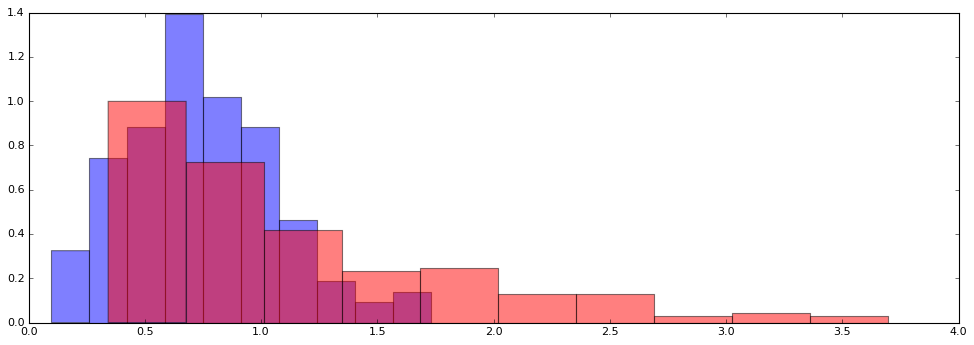

In [26]:
frames = []
for id_frame in range(1,20):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    if id_frame < 16:
        X0, Y0, Z0 = SI(frame[frame.Type == 'F'], 'micro')
        X1, Y1, Z1 = SI(frame[frame.Type == 'M'], 'micro')
    else:
        X0, Y0, Z0 = SI(frame[frame.Type == 'F'], 'mm')
        X1, Y1, Z1 = SI(frame[frame.Type == 'M'], 'mm')
    for d in inter(X0, Y0, Z0, X1, Y1, Z1):
        frames.append([d, 'M'])
    for d in intra(X0, Y0, Z0):
        frames.append([d, 'F'])
frames = DataFrame(data=frames, columns=['d', 'sex'])
#%Rpush frames
fig = plt.figure(figsize=(15,5))
axes = fig.add_subplot(1,1,1)
histM = axes.hist(frames[frames.sex == 'M'].d.tolist(), alpha=.5, color='b', normed=True)
histF = axes.hist(frames[frames.sex == 'F'].d.tolist(), alpha=.5, color='r', normed=True)

In [27]:
frames[frames.sex == 'F'].describe()

d
count  206.000000
mean     1.112671
std      0.713295
min      0.342031
25%      0.581592
50%      0.874903
75%      1.512766
max      3.695401

In [28]:
frames[frames.sex == 'M'].describe()

d
count  132.000000
mean     0.746780
std      0.325368
min      0.098289
25%      0.551138
50%      0.710977
75%      0.940185
max      1.731730

## Providing estimates of abundance and volumetric density of fish using individual 3D coordinates

Using convex hulls we are able to estimate the density of a set of fish.

In [29]:
from wanda.concentration import convex_hull_concentration
frames = []
for id_frame in range(1,13):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    for sex in ['F', 'M']:
        X, Y, Z = SI(frame[frame.Type == sex], 'micro')
        c = convex_hull_concentration(X, Y, Z, nmin=3)
        frames.append([c, sex])
frames = DataFrame(data=frames, columns=['c', 'sex'])
#%Rpush frames
frames.dropna(0, 'any')

c sex
0   2.450088   F
1   1.228412   M
2   3.620624   F
3   1.186523   M
4   3.429632   F
5   1.091303   M
6   5.168258   F
7   1.601316   M
8   2.203265   F
9   2.369772   M
11  1.402278   M
13  3.562269   M
15  1.823780   M
17  2.947524   M
19  2.536074   M
20  4.947402   F
22  2.928430   F

In [30]:
frames[frames.sex == 'F'].describe()

c
count  7.000000
mean   3.535385
std    1.154652
min    2.203265
25%    2.689259
50%    3.429632
75%    4.284013
max    5.168258

In [31]:
frames[frames.sex == 'M'].describe()

c
count  10.000000
mean    1.974925
std     0.842378
min     1.091303
25%     1.271879
50%     1.712548
75%     2.494498
max     3.562269

Given the number of frames the data is limited.
Nevertheless males and females could be compared using Wilcoxon rank sum test for instances.

But this approach is not entirely satisfying since one compare densities between different frames.
Fish groups are therefore have not the same size and it could be relevant only if fishes are uniformly distributed into their convex hull.
In order to investigate this property we considered the density as a function of the distance of the barycenter of fish groups.
As illustrated on the below (log of density as function of the log distance to the barycenter) the fishes are clearly not uniformly distributed into their convex-hulls.

In [32]:
from wanda.concentration import radiuses
fig = plt.figure(figsize=(15,5))
axes = plt.subplot(1,1,1)
logx = True
logy = True
frames = []
for id_frame in range(1,13):
    frame = read_csv(data/'frame_'+str(id_frame)+'/points.csv', sep='\t')
    for sex, color in zip(['F', 'M'], ['ko', 'kD']):
        X, Y, Z = SI(frame[frame.Type == sex], 'micro')
        r = radiuses(X, Y, Z)
        c = [convex_hull_concentration(X, Y, Z, i, nmin=7) for i in r]
        if logx:
            r = [math.log(r) for r in r]
        if logy:
            c = [math.log(c) for c in c]
        plt.plot(r,c,color, markersize=10., alpha=.3+.3*(sex=='M'))
        for r, c in zip(r, c):
            frames.append([r, c, sex])
axes.set_xlabel('Distance to the barycenter')
axes.set_ylabel('Concentration')
frames = DataFrame(data=frames, columns=['r', 'c', 'sex'])
fig.savefig('density.svg')
#%Rpush frames

In fact, it seems that for a group $i$ of individuals of same sex $s_i$: 

$$ \log(d_i) = \alpha_{s_i} + \beta_{s_i} \times r_i + \epsilon_i$$

where:

* $d_i$ is the density of the group,
* $r_i$ is the maximal distance to the barycenter encountered in the group $i$,
* $\epsilon_i$

When fitting the linear model to data, both test and model selection approaches propose to consider the following model (the slope is not depending on the sex) :

$$ \log(d_i) = \alpha_{s_i} + \beta \times r_i + \epsilon_i$$

This is particularly interesting since the difference between males and females is therefore only concerning the intercept.
Then

$$\forall r \in \mathbb{R}^+, \quad \frac{d_M}{d_F} = \exp(\alpha_{M}-\alpha_{F}) $$

can be used to compare densities.

From this table we have $\alpha_M - \alpha_F = -0.68714$.
For a same radius of an enclosing circle, the density of females is therefore $\frac{1}{\exp(-0.68714)} \approx \frac{1}{.50} \approx 2.$ times higher that the one of males.